## Section 1: Installation

### Installation of igraph package for Unix based OS

For Mac and other Unix based OS, installation of the igraph package can be executed via pip command in the IDE command prompt

- pip install python-igraph

### Installation of igraph package for Windows (for Anaconda/Jupyter)

For Windows users, installation of the igraph package can be executed via pip command in the IDE command prompt

- pip install igraph

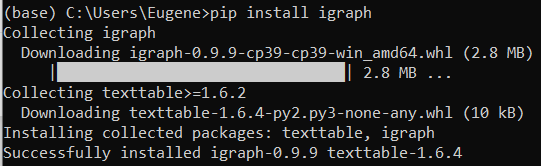

- pip install pycairo

or install using conda:
- conda install -c conda-forge python-igraph

Other information can be found at: https://igraph.readthedocs.io/en/stable/

and some information guides: 
- https://igraph.readthedocs.io/en/stable/install.html
- https://igraph.org/c/html/latest/igraph-Installation.html

In [2]:
pip install igraph


  Using cached igraph-0.11.3-cp39-abi3-win_amd64.whl (2.5 MB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
pip install pycairo

     ------------------------------------- 877.2/877.2 kB 27.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


## Section 2: Initialise igraph objects

### Loading packages

In [27]:
import igraph as ig    # igraph library
import pandas as pd    # standard data manipulation libary in python. (Analagous to R's dplyr)
import numpy as np

Intitialize a directed igraph object. By default, the graph object is undirected. Therefore if a directed graph is required, we need to specify <b>directed = True</b>.

In [5]:
g = ig.Graph(directed = True)

Define 3 vertices associated with graph g.

In [6]:
g.add_vertices(3)

Add <b>directed</b> edges to vertices. Note that enumeration begins from 0.

In [7]:
g.add_edges([(0,1),(1,2),(2,0)])

[(0,1), (1,2), (2,0)]: This is a list of tuples, with each tuple representing an edge. Each tuple contains two integers, where each integer is the index of a vertex. So, this list is specifying three edges to be added to the graph:

An edge between vertex 0 and vertex 1.
An edge between vertex 1 and vertex 2.
An edge between vertex 2 and vertex 0.

Generate a print out of the graph information.

In [8]:
print(g)

IGRAPH D--- 3 3 --
+ edges:
0->1 1->2 2->0


You can plot the graph graphically as well.

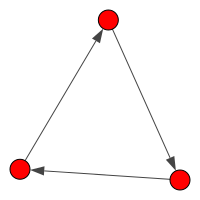

In [9]:
ig.plot(g, bbox = (200,200), margin = 20)

When you have a graph with many nodes and edges, you may wish to use an algorithm to try and generate the plots so that they are display in an organized manner. A common algorithm used is "kamada_kawai". For more on plots, please refer to the following link: https://igraph.org/python/doc/tutorial/tutorial.html#layouts-and-plotting

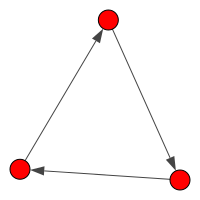

In [10]:
ig.plot(g,layout=g.layout("kamada_kawai"), bbox = (200,200), margin = 20)

While vertices are indexed, these indices do not translate to labels that will show up in the plots. To do so, we need to give labels to each of these vertices. After doing so, the labels will appear in the plots.

In [11]:
g.vs["label"] = list(range(3))

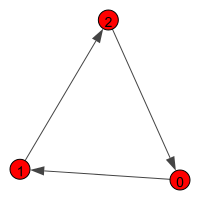

In [12]:
ig.plot(g, bbox = (200,200), margin = 20)

## Loading and playing with real data (Star Wars)

In this section we will be using the same dataset used for the R tutorials. More details of the dataset can be found in https://github.com/evelinag/StarWars-social-network.

In [13]:
# libraries to load json data and read data directly from url source.
import json, urllib.request  

# url of our network data
target_url = 'https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/networks/starwars-full-interactions.json'

# pulling and saving the data into a variable
data = urllib.request.urlopen(target_url).read()

# parse the json data set
output = json.loads(data)

In [14]:
output

{'nodes': [{'name': 'QUI-GON', 'value': 61, 'colour': '#4f4fb1'},
  {'name': 'NUTE GUNRAY', 'value': 24, 'colour': '#808080'},
  {'name': 'PK-4', 'value': 3, 'colour': '#808080'},
  {'name': 'TC-14', 'value': 4, 'colour': '#808080'},
  {'name': 'OBI-WAN', 'value': 147, 'colour': '#48D1CC'},
  {'name': 'DOFINE', 'value': 3, 'colour': '#808080'},
  {'name': 'RUNE', 'value': 10, 'colour': '#808080'},
  {'name': 'TEY HOW', 'value': 4, 'colour': '#808080'},
  {'name': 'EMPEROR', 'value': 51, 'colour': '#191970'},
  {'name': 'CAPTAIN PANAKA', 'value': 19, 'colour': '#808080'},
  {'name': 'SIO BIBBLE', 'value': 8, 'colour': '#808080'},
  {'name': 'JAR JAR', 'value': 41, 'colour': '#9a9a00'},
  {'name': 'TARPALS', 'value': 3, 'colour': '#808080'},
  {'name': 'BOSS NASS', 'value': 4, 'colour': '#808080'},
  {'name': 'PADME', 'value': 74, 'colour': '#DDA0DD'},
  {'name': 'RIC OLIE', 'value': 11, 'colour': '#808080'},
  {'name': 'WATTO', 'value': 8, 'colour': '#808080'},
  {'name': 'ANAKIN', 'val

Once we have loaded and parsed the json dataset, we will convert it into a pandas dataframe. This allows use to further massage the data to serve our purposes. In this example, we will merely use it to merge the data, derive summary statistics and also make use of the panda's functions to convert the data into a list of tuples for igraph to process.

In [16]:
# by default, the main hiearchy of the json file has 2 elements in a array with the first element containing the nodes
# information and the second containing the information of the edges.

# output

nodes = pd.concat(
    [
        pd.DataFrame( output["nodes"] ),
        pd.DataFrame({'id':[i for i in range(len(output["nodes"]))]})
    ],
    axis=1
).rename(
    columns={"value":"num_ind_appear"}
)
edges = pd.DataFrame(output["links"]).rename(columns={"source":"id","value":"num_tar_appear"})

In [18]:
len(output["nodes"])

110

In [13]:
nodes.head()

,name,num_ind_appear,colour,id
0,QUI-GON,61,#4f4fb1,0
1,NUTE GUNRAY,24,#808080,1
2,PK-4,3,#808080,2
3,TC-14,4,#808080,3
4,OBI-WAN,147,#48D1CC,4


In [20]:
edges.head()

,id,target,num_tar_appear
0,1,0,1
1,2,3,1
2,4,3,1
3,0,3,1
4,4,0,26


We now merge the nodes and edges dataframes to create a single dataframe of every individual and their associations. <b>NOTE</b> that we drop rows with NaN as it implies that some of these characters have never appeared together before.

In [21]:
# Merge 'nodes' and 'edges' DataFrames
df_network = pd.merge(
    nodes,  # The DataFrame containing node information
    edges,  # The DataFrame containing edge information

    # Perform the merge using 'id' column from both 'nodes' and 'edges'
    # 'id' in 'nodes' is likely to represent the node itself
    # 'id' in 'edges' probably represents the source node of the edge
    left_on='id', right_on='id',

    # Choose 'left' merge to ensure all nodes are included in the result
    # If a node does not have a corresponding edge, it will still appear
    # with NaN in the columns coming from the 'edges' DataFrame
    how='left'
)

In [22]:
df_network.head()

,name,num_ind_appear,colour,id,target,num_tar_appear
0,QUI-GON,61,#4f4fb1,0,3.0,1.0
1,QUI-GON,61,#4f4fb1,0,10.0,2.0
2,QUI-GON,61,#4f4fb1,0,15.0,2.0
3,QUI-GON,61,#4f4fb1,0,16.0,6.0
4,QUI-GON,61,#4f4fb1,0,18.0,2.0


In final dataframe, we have 6 variables each with the following descriptions

- colour: hex colour cddes. grey color are designated for unimportant characters.
- name: name of the characters
- num_id_appear: number of times the character appeared in star wars films
- id: unique number assigned to each unique character
- target: the id of the other character the character in question has appeared together in star wars films
- num_tar_appear: the number of times the other character has appeared together with the character in question

Merge Function: pd.merge() is a function in pandas used to merge two DataFrames. The basic concept is similar to SQL joins.

DataFrames:

nodes: This DataFrame contains information about the nodes in your network. From your previous code, it includes an id column and possibly other columns like num_ind_appear.
edges: This DataFrame contains information about the edges. It also includes an id column, which, based on your previous code, seems to represent the source of an edge, and other columns like num_tar_appear.
Merge Keys:

left_on='id' and right_on='id': These parameters tell pandas to use the id column in both DataFrames as the key for merging.
Type of Merge - how='left':

This parameter specifies the type of merge to perform. A 'left' merge means that all rows from the nodes DataFrame (the left DataFrame) will be included in the resulting DataFrame. If there are matches in the edges DataFrame (the right DataFrame), those will be included; if not, the new columns from the edges DataFrame will be filled with NaNs for those rows.

In [23]:
# summary statistics
print(df_network.describe())

       num_ind_appear          id      target  num_tar_appear
count      428.000000  428.000000  398.000000      398.000000
mean        51.072430   43.490654   43.326633        3.695980
std         56.543961   32.195864   32.065877        7.227887
min          2.000000    0.000000    0.000000        1.000000
25%          5.750000   17.000000   14.000000        1.000000
50%         22.000000   33.000000   37.500000        2.000000
75%         98.000000   69.250000   69.000000        3.000000
max        169.000000  109.000000  109.000000       69.000000


Assigning the respective names to the vertices. By default, the ids' are used.

Creating an igraph object using the network dataframe created. Note that characters here are nodes and each node are associated base on joint appearances in star wars films. As such, note that the graph is undirected.

In [25]:
# Create an igraph Graph from a DataFrame
g_sw = ig.Graph.TupleList(
    # Select relevant columns from df_network and convert them to tuples
    # 'id' represents the source node, 'target' represents the target node,
    # and 'num_tar_appear' is an attribute of the edge
    df_network[['id','target','num_tar_appear']].itertuples(index=False),

    directed = False,  # Specify that the graph is undirected

    # Indicate that the third element of the tuple (originally 'num_tar_appear')
    # is an edge attribute
    edge_attrs="num_tar_appear"
)

Because some characters do not interact with each other, the merging of the nodes and edge dataframes yields vertices which are invalid. By default igraph will create nan vertices and therefore we will need to remove these.

In [30]:
g_sw.delete_vertices([v.index for v in g_sw.vs if pd.isna(v['name'])])
#The code effectively cleans up the graph g_sw by removing any vertices that do not have a valid 'name' attribute (i.e., vertices with a 'name' attribute that is NaN)

Plot the network

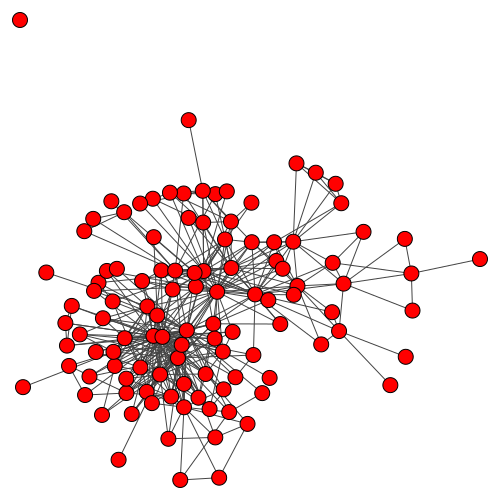

In [31]:
# Plot of the network

ig.plot(g_sw, layout=g_sw.layout("kamada_kawai"), bbox = (500,500),vertex_label_size = 8, vertex_size = 15)

#ig.plot(g_sw, bbox = (500,500),vertex_label_size = 8, vertex_size = 15)

Assigning the respective names labels to the vertices. By default, the ids' are used. We also assign the names to the labels so that the plots would have the labels. Note that some strange numbers appear on the labels in the plots. Could not ascertain why but these errors are likely due to character formatting issues. We will leave them as they are.

In [32]:
tmp = []
tmp_id = df_network["id"].unique()
tmp_name = df_network['name'][ df_network["id"].isin(tmp_id )].unique()
for i in range(len(g_sw.vs['name'])):
    for k in range(len(tmp_id)):
        if float(g_sw.vs['name'][i]) == float(tmp_id[k]):
            tmp.append(tmp_name[k])
            break
            
g_sw.vs['name'] = tmp
g_sw.vs['label'] = tmp

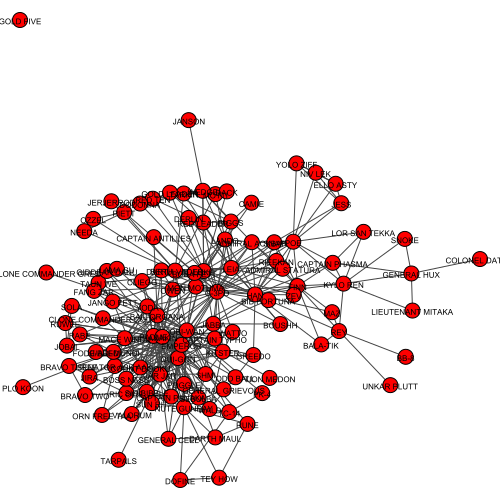

In [33]:
# Plot of the network with names displayed.
ig.plot(
    g_sw, layout=g_sw.layout("kamada_kawai"), bbox = (500,500),
    vertex_label_size = 8, vertex_size = 15
)

We next use the color labels and add them as information to the graph to allow color differention between the vertices.

In [34]:
tmp = []
tmp_name = df_network['name'][ df_network["id"].isin(tmp_id )]
tmp_color = df_network['colour'][ df_network["id"].isin(tmp_id )]
for i in range(len(g_sw.vs['name'])):
    for k in range(len(tmp_name)):
        if g_sw.vs['name'][i] == tmp_name[k]:
            tmp.append(tmp_color[k])
            break
            
g_sw.vs['color'] = tmp

In the plots, you will notice that the main characters are highlited in colour while the others are highlighted in grey.

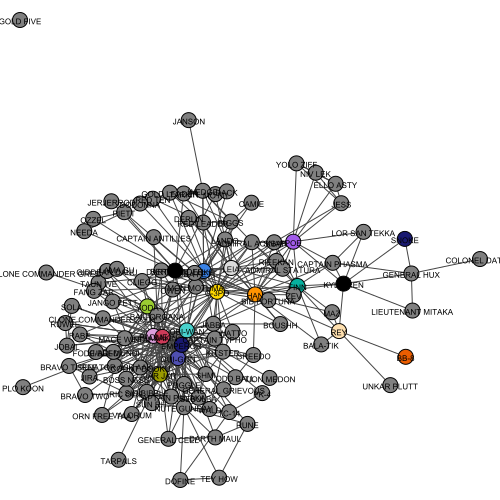

In [35]:
ig.plot(
    g_sw, layout=g_sw.layout("kamada_kawai"), bbox = (500,500),
    vertex_label_size = 8, vertex_size = 15
)

## Section 3: Centrality Measures

List the top 10 characters with the highest degree (number of links to vertex)

In [36]:
pd.DataFrame(
    {
        "name":g_sw.vs['name'],
        "degree": g_sw.degree()
    }
).sort_values(by=['degree'], ascending=False).head(10)

,name,degree
37,ANAKIN,41
17,OBI-WAN,35
14,PADME,33
39,C-3PO,33
0,QUI-GON,26
30,LUKE,24
25,JAR JAR,24
56,HAN,23
24,EMPEROR,22
55,LEIA,21


Calculate the degree of a specific character. Qui-Gon.

In [37]:
g_sw.vs.find(name = 'QUI-GON').degree()

26

List top 10 characters with the largest measure of betweeness

(number of times vertex acts as a bridge along the shortest path between 2 other vertices)

Note how a relatively new character like Kylo Ren appears amongst the top 10.

In [38]:
pd.DataFrame(
    {
        "name":g_sw.vs['name'],
        "betweenness": g_sw.betweenness()
    }
).sort_values(by=['betweenness'], ascending=False).head(10)

,name,betweenness
17,OBI-WAN,1253.114204
39,C-3PO,1134.119476
56,HAN,1066.633822
37,ANAKIN,954.537559
30,LUKE,811.218041
53,DARTH VADER,518.272917
62,POE,492.176086
24,EMPEROR,437.526271
14,PADME,408.896232
88,KYLO REN,332.329689


Calculate the betweenness of Qui-Gon

In [39]:
g_sw.vs.find(name = 'QUI-GON').betweenness()

213.1451609489284

Other centrality and graph measures can be found at: https://igraph.org/python/api/0.9.7/igraph._igraph.GraphBase.html